# **IMPORTING REQUIRED LIBRARIES**




In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import random
import pydotplus

warnings.filterwarnings('ignore') 
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from pylab import rcParams 
from matplotlib.cm import rainbow
from prettytable import PrettyTable 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# **IMPORTING THE DATASET**

In [ ]:
#importing the dataset
df = pd.read_csv('/content/heart(1221).csv')
df = pd.DataFrame(df)
df.head()


age  sex  cp  trestbps  chol  ...  thalach  exang  oldpeak  slope  target
0   63    1   3       145   233  ...      150      0      2.3      0       1
1   37    1   2       130   250  ...      187      0      3.5      0       1
2   41    0   1       130   204  ...      172      0      1.4      2       1
3   56    1   1       120   236  ...      178      0      0.8      2       1
4   57    0   0       120   354  ...      163      1      0.6      2       1

[5 rows x 12 columns]

In [ ]:
#specifies rows and columns
df.shape

(1220, 12)

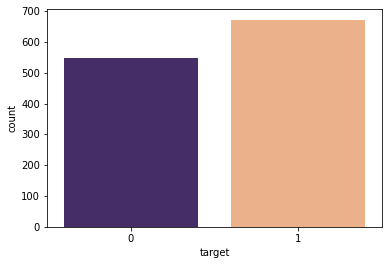

In [ ]:
#to check if the data is balanced
sns.countplot(df['target'],palette=['#432371',"#FAAE7B"])#Show the counts of observations
plt.show()


In [ ]:
print("Null values :: ")
print(df.isnull() .sum())


Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64


DUPLICATION CHECK

In [ ]:
#Check duplicate rows in data
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
# #Removing the duplicate row
# df = df.drop_duplicates()
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1220 non-null   int64  
 1   sex       1220 non-null   int64  
 2   cp        1220 non-null   int64  
 3   trestbps  1220 non-null   int64  
 4   chol      1220 non-null   int64  
 5   fbs       1220 non-null   int64  
 6   restecg   1220 non-null   int64  
 7   thalach   1220 non-null   int64  
 8   exang     1220 non-null   int64  
 9   oldpeak   1220 non-null   float64
 10  slope     1220 non-null   int64  
 11  target    1220 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 114.5 KB


# **CORRELATION MATRIX**

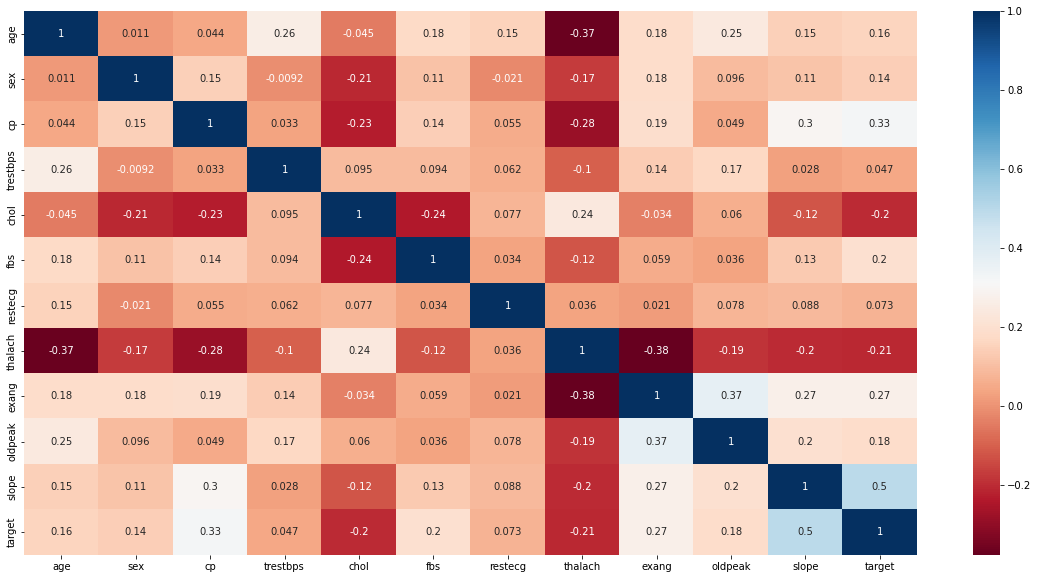

In [ ]:
#Visualization of Correlation of attributes with HeatMap 
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c, cmap = 'RdBu', annot = True)
plt.show()


# **ONE HOT ENCODING**

In [ ]:
x= df.iloc[:,:-1] 
y= df.iloc[:,-1] 

#df = pd.get_dummies(df, columns = ['cp','restecg','slope','ca','thal'])

# standardScaler = StandardScaler() #removes the mean and scales each feature/variable to unit variance.
# columns_to_scale = ['age','trestbps','chol','thalach','exang','oldpeak']
# df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])#fit_transform() is used for the initial fitting of parameters on the training set x, while also returning the transformed x
# display(df)


In [ ]:
# df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
# plt.show()

# **SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
random.seed(10) 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10)
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

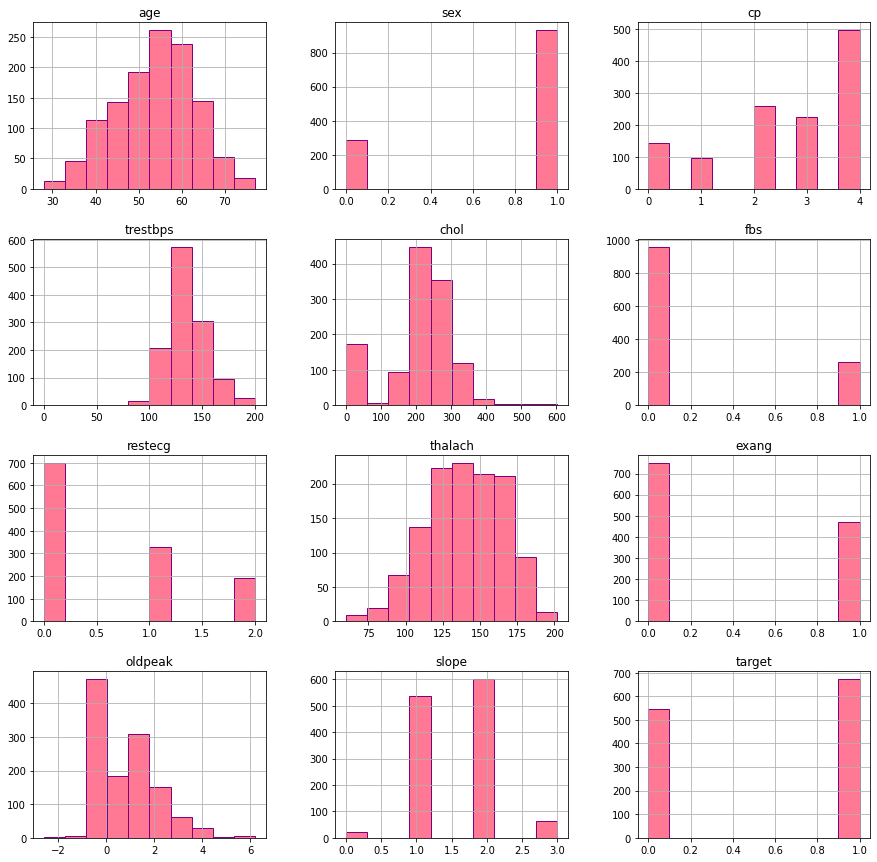

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **FEATURE SELCTION** 

Pearson

In [ ]:
# #Correlation with output variable
# c_target = abs(c["target"])
# #Selecting highly correlated features
# relevant_features = c_target[c_target>0.3]
# relevant_features

In [ ]:
# df = df[["cp","slope","target"]]
# df.head()

Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.193 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.206 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.180 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.199 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.200 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.231 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.234 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.229 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.227 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.226 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.249 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)

In [ ]:
print(importance)

[0.         0.         0.02630235 0.         0.         0.
 0.         0.         0.         0.         0.13612884]


In [ ]:
df = df[["age","sex","cp","trestbps","fbs","restecg","slope","target"]]
df.head()

age  sex  cp  trestbps  fbs  restecg  slope  target
0   63    1   3       145    1        0      0       1
1   37    1   2       130    0        1      0       1
2   41    0   1       130    0        0      2       1
3   56    1   1       120    0        1      2       1
4   57    0   0       120    0        1      2       1

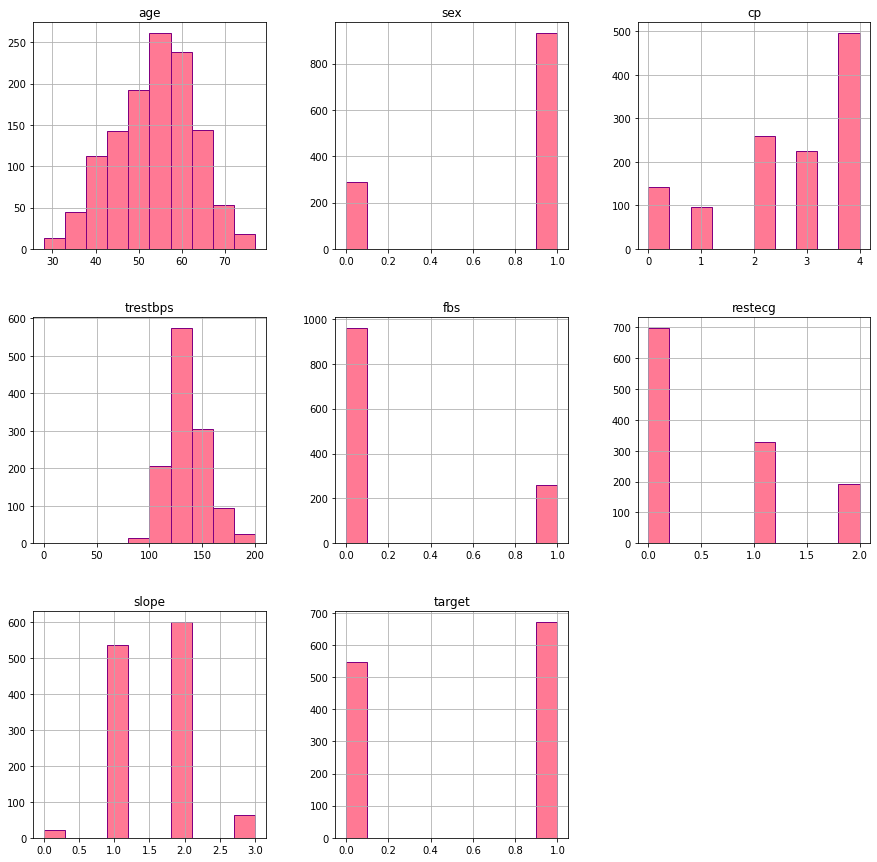

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

In [ ]:
x= df.iloc[:,:-1] 
y= df.iloc[:,-1] 

In [ ]:
random.seed(10) 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10)
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

# **NORMALIZATION**

In [ ]:
cols_to_norm = ["age","sex","cp","trestbps","fbs","restecg","slope"]
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
display(df)
# df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
# display(df)  

age  sex    cp  trestbps  fbs  restecg     slope  target
0     0.714286  1.0  0.75     0.725  1.0      0.0  0.000000       1
1     0.183673  1.0  0.50     0.650  0.0      0.5  0.000000       1
2     0.265306  0.0  0.25     0.650  0.0      0.0  0.666667       1
3     0.571429  1.0  0.25     0.600  0.0      0.5  0.666667       1
4     0.591837  0.0  0.00     0.600  0.0      0.5  0.666667       1
...        ...  ...   ...       ...  ...      ...       ...     ...
1215  0.346939  1.0  0.25     0.550  0.0      0.0  0.666667       1
1216  0.816327  1.0  1.00     0.720  1.0      0.0  0.666667       1
1217  0.591837  1.0  1.00     0.650  0.0      0.0  0.666667       1
1218  0.591837  0.0  0.50     0.650  0.0      1.0  0.666667       1
1219  0.204082  1.0  0.75     0.690  0.0      0.0  0.333333       0

[1220 rows x 8 columns]

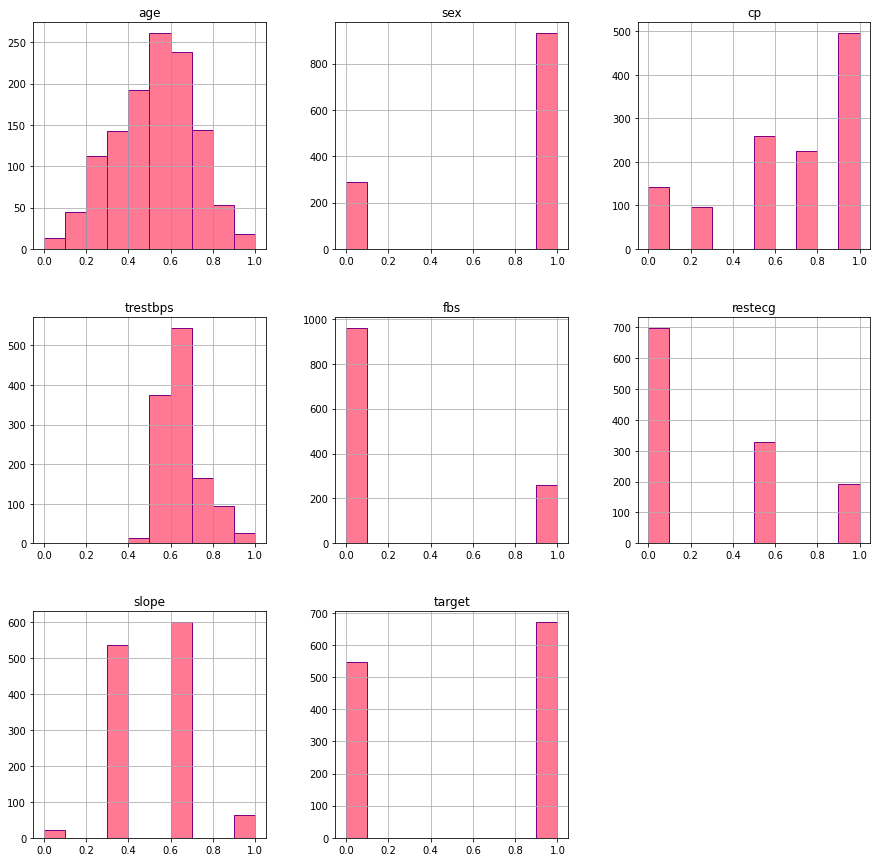

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **K-NEAREST NEIGHBORS**


**CHECKING FOR THE BEST K VALUE**

Minimum error:- 0.19672131147540983 at K = 8


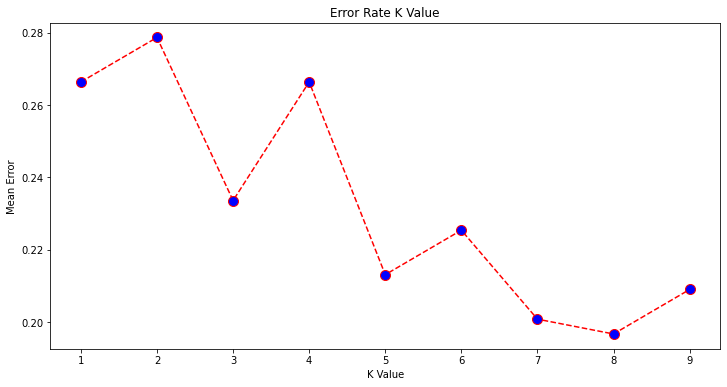

In [ ]:
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #print(error.append(np.mean(pred_i != y_test)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)


**TRAINING**

In [ ]:
#print(pd.DataFrame(x_train))


3 METRICS OF KNN

In [ ]:
#3 metrics
KNN_mi= KNeighborsClassifier(n_neighbors=5, metric = 'minkowski') 
KNN_e= KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_ma= KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='uniform')
KNN_j= KNeighborsClassifier(n_neighbors=5, metric = 'jaccard')
KNN_h= KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
KNN_c= KNeighborsClassifier(n_neighbors=5, metric = 'cosine')

KNN_mi.fit(x_train, y_train)
KNN_e.fit(x_train, y_train)
KNN_ma.fit(x_train, y_train)
KNN_j.fit(x_train, y_train)
KNN_h.fit(x_train, y_train)
KNN_c.fit(x_train, y_train)

y_pred_mi= KNN_mi.predict(x_test)
y_pred_e= KNN_e.predict(x_test)
y_pred_ma= KNN_ma.predict(x_test)
y_pred_j= KNN_j.predict(x_test)
y_pred_h= KNN_h.predict(x_test)
y_pred_c= KNN_c.predict(x_test)

print('\nKNN Minkowski Prediction:\n',y_pred_mi)
print('\nKNN Euclidean Prediction:\n',y_pred_e)
print('\nKNN Manhattan Prediction:\n',y_pred_ma)
print('\nKNN Jaccard Prediction:\n',y_pred_j)
print('\nKNN Hamming Prediction:\n',y_pred_h)
print('\nKNN Cosine Prediction:\n',y_pred_c)



KNN Minkowski Prediction:
 [0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1]

KNN Euclidean Prediction:
 [0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 

**CONFUSION MATRIX**

Manhattan Metric


 CLASSIFICATION REPORT OF MANHATTAN METRIC:

               precision    recall  f1-score   support

           0       0.73      0.79      0.76       107
           1       0.82      0.77      0.80       137

    accuracy                           0.78       244
   macro avg       0.78      0.78      0.78       244
weighted avg       0.78      0.78      0.78       244


 RECALL SCORE OF MANHATTAN METRIC :  0.6524267551133223

 PRECISION SCORE OF MANHATTAN METRIC :  0.63801036001036

 F1 SCORE OF MANHATTAN METRIC :  0.6330163597599349




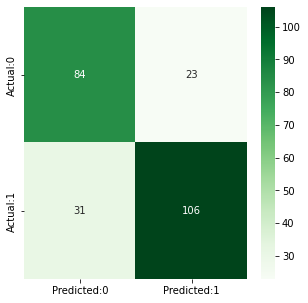

In [ ]:
 from sklearn.model_selection import cross_val_score
 
cm_ma=confusion_matrix(y_test, y_pred_ma)
print('\n CLASSIFICATION REPORT OF MANHATTAN METRIC:\n\n',classification_report(y_test, y_pred_ma))
cm_ma = pd.DataFrame(data = cm_ma, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_ma_r= cross_val_score(KNN_ma, x, y, scoring="recall", cv = 5).mean()
KNN_ma_p= cross_val_score(KNN_ma, x, y, scoring="precision", cv = 5).mean()
KNN_ma_f1=cross_val_score(KNN_ma, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF MANHATTAN METRIC : ',KNN_ma_r)
print('\n PRECISION SCORE OF MANHATTAN METRIC : ',KNN_ma_p)
print('\n F1 SCORE OF MANHATTAN METRIC : ',KNN_ma_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_ma, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Minkowski Metric


 CLASSIFICATION REPORT OF MINKOWSKI METRIC:

               precision    recall  f1-score   support

           0       0.74      0.79      0.76       107
           1       0.82      0.79      0.81       137

    accuracy                           0.79       244
   macro avg       0.78      0.79      0.78       244
weighted avg       0.79      0.79      0.79       244


 RECALL SCORE OF MINKOWSKI METRIC :  0.7883211678832117

 PRECISION SCORE OF MINKOWSKI METRIC :  0.8244274809160306

 F1 SCORE OF MINKOWSKI METRIC :  0.8059701492537314




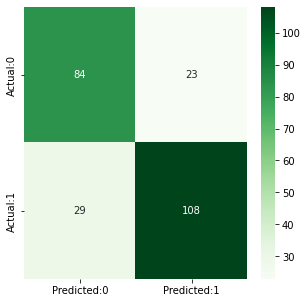

In [ ]:
cm_mi=confusion_matrix(y_test, y_pred_mi)
print('\n CLASSIFICATION REPORT OF MINKOWSKI METRIC:\n\n',classification_report(y_test, y_pred_mi))
cm_mi = pd.DataFrame(data = cm_mi, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_mi_r=cross_val_score(KNN_mi, x, y, scoring="recall", cv = 5).mean()
KNN_mi_p=cross_val_score(KNN_mi, x, y, scoring="precision", cv = 5).mean()
KNN_mi_f1=cross_val_score(KNN_mi, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF MINKOWSKI METRIC : ', recall_score(y_test, y_pred_mi))
print('\n PRECISION SCORE OF MINKOWSKI METRIC : ', precision_score(y_test, y_pred_mi))
print('\n F1 SCORE OF MINKOWSKI METRIC : ', f1_score(y_test, y_pred_mi))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_mi, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Euclidean Metric


 CLASSIFICATION REPORT OF EUCLIDEAN METRIC:

               precision    recall  f1-score   support

           0       0.74      0.79      0.76       107
           1       0.82      0.79      0.81       137

    accuracy                           0.79       244
   macro avg       0.78      0.79      0.78       244
weighted avg       0.79      0.79      0.79       244


 RECALL SCORE OF EUCLIDEAN METRIC :  0.7883211678832117

 PRECISION SCORE OF EUCLIDEAN METRIC :  0.8244274809160306

 F1 SCORE OF EUCLIDEAN METRIC :  0.8059701492537314




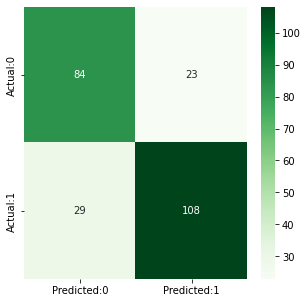

In [ ]:
cm_e=confusion_matrix(y_test, y_pred_e)
print('\n CLASSIFICATION REPORT OF EUCLIDEAN METRIC:\n\n',classification_report(y_test, y_pred_e))
cm_e = pd.DataFrame(data = cm_e, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_e_r=cross_val_score(KNN_e, x, y, scoring="recall", cv = 5).mean()
KNN_e_p=cross_val_score(KNN_e, x, y, scoring="precision", cv = 5).mean()
KNN_e_f1=cross_val_score(KNN_e, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF EUCLIDEAN METRIC : ', recall_score(y_test, y_pred_e))
print('\n PRECISION SCORE OF EUCLIDEAN METRIC : ', precision_score(y_test, y_pred_e))
print('\n F1 SCORE OF EUCLIDEAN METRIC : ', f1_score(y_test, y_pred_e))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_e, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Jaccard Metric


 CLASSIFICATION REPORT OF JACCARD METRIC:

               precision    recall  f1-score   support

           0       0.44      1.00      0.61       107
           1       0.00      0.00      0.00       137

    accuracy                           0.44       244
   macro avg       0.22      0.50      0.30       244
weighted avg       0.19      0.44      0.27       244


 RECALL SCORE OF JACCARD METRIC :  0.6109010503040354

 PRECISION SCORE OF JACCARD METRIC :  0.6543541546173125

 F1 SCORE OF JACCARD METRIC :  0.6038336949528601




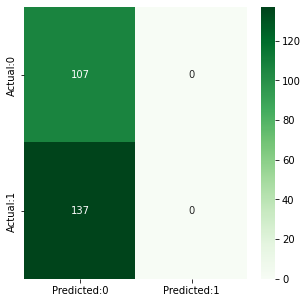

In [ ]:
cm_j=confusion_matrix(y_test, y_pred_j)
print('\n CLASSIFICATION REPORT OF JACCARD METRIC:\n\n',classification_report(y_test, y_pred_j))
cm_j = pd.DataFrame(data = cm_j, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_j_r=cross_val_score(KNN_j, x, y, scoring="recall", cv = 5).mean()
KNN_j_p=cross_val_score(KNN_j, x, y, scoring="precision", cv = 5).mean()
KNN_j_f1=cross_val_score(KNN_j, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF JACCARD METRIC : ',KNN_j_r )
print('\n PRECISION SCORE OF JACCARD METRIC : ',KNN_j_p)
print('\n F1 SCORE OF JACCARD METRIC : ', KNN_j_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_j, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Hamming Metric


 CLASSIFICATION REPORT OF HAMMING METRIC:

               precision    recall  f1-score   support

           0       0.74      0.84      0.79       107
           1       0.86      0.77      0.82       137

    accuracy                           0.80       244
   macro avg       0.80      0.81      0.80       244
weighted avg       0.81      0.80      0.80       244


 RECALL SCORE OF HAMMING METRIC :  0.7427418463239359

 PRECISION SCORE OF HAMMING METRIC :  0.7677228941426248

 F1 SCORE OF HAMMING METRIC :  0.7508952542419449




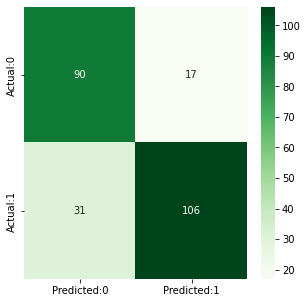

In [ ]:
cm_h=confusion_matrix(y_test, y_pred_h)
print('\n CLASSIFICATION REPORT OF HAMMING METRIC:\n\n',classification_report(y_test, y_pred_h))
cm_h = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_h_r=cross_val_score(KNN_h, x, y, scoring="recall", cv = 5).mean()
KNN_h_p=cross_val_score(KNN_h, x, y, scoring="precision", cv = 5).mean()
KNN_h_f1=cross_val_score(KNN_h, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF HAMMING METRIC : ', KNN_h_r)
print('\n PRECISION SCORE OF HAMMING METRIC : ',KNN_h_p)
print('\n F1 SCORE OF HAMMING METRIC : ', KNN_h_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_h, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


Cosine Metric


 CLASSIFICATION REPORT OF COSINE METRIC:

               precision    recall  f1-score   support

           0       0.74      0.81      0.77       107
           1       0.84      0.77      0.81       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.80      0.79      0.79       244


 RECALL SCORE OF COSINE METRIC :  0.7013819789939193

 PRECISION SCORE OF COSINE METRIC :  0.692650933936525

 F1 SCORE OF COSINE METRIC :  0.6828635346074334




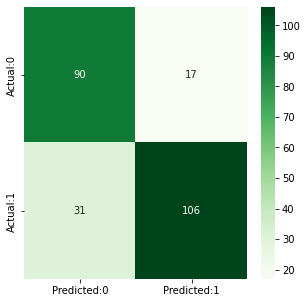

In [ ]:
cm_c=confusion_matrix(y_test, y_pred_c)
print('\n CLASSIFICATION REPORT OF COSINE METRIC:\n\n',classification_report(y_test, y_pred_c))
cm_c = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_c_r=cross_val_score(KNN_c, x, y, scoring="recall", cv = 5).mean()
KNN_c_p=cross_val_score(KNN_c, x, y, scoring="precision", cv = 5).mean()
KNN_c_f1=cross_val_score(KNN_c, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE OF COSINE METRIC : ', KNN_c_r)
print('\n PRECISION SCORE OF COSINE METRIC : ',KNN_c_p)
print('\n F1 SCORE OF COSINE METRIC : ',KNN_c_f1)
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_c, annot = True, fmt ='d', cmap = "Greens")
plt.show()

#(actual(t)==prediction(t)) (actual(t)!=prediction(t))
#(actual(t)!=prediction(t)) (actual(t)==prediction(t))
#correct prediction=29+23=52
#wrong prediction=6+3=9
#evaluation metric


**ACCURACY**

In [ ]:
KNN_ma_acc=cross_val_score(KNN_ma, x, y, scoring="accuracy", cv = 5).mean()
KNN_mi_acc=cross_val_score(KNN_mi, x, y, scoring="accuracy", cv = 5).mean()
KNN_e_acc=cross_val_score(KNN_e, x, y, scoring="accuracy", cv = 5).mean()
KNN_j_acc=cross_val_score(KNN_j, x, y, scoring="accuracy", cv = 5).mean()
KNN_h_acc=cross_val_score(KNN_h, x, y, scoring="accuracy", cv = 5).mean()
KNN_c_acc=cross_val_score(KNN_c, x, y, scoring="accuracy", cv = 5).mean()

# print('MANHATTAN:',KNN_ma_acc)
# print('MINKOWSKI:',KNN_mi_acc)
# print('EUCLIDEAN:',KNN_e_acc)
# print('JACCARD:',KNN_j_acc)
# print('HAMMING:',KNN_h_acc)
# print('COSINE :',KNN_c_acc)

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc,KNN_ma_p,KNN_ma_r,KNN_ma_f1]) 
myTable.add_row(["Minkowski",KNN_mi_acc,KNN_mi_p,KNN_mi_r,KNN_mi_f1]) 
myTable.add_row(["Euclidean",KNN_e_acc,KNN_e_p,KNN_e_r,KNN_e_f1]) 
myTable.add_row(["Jaccard",KNN_j_acc,KNN_j_p,KNN_j_r,KNN_j_f1]) 
myTable.add_row(["Hamming",KNN_h_acc,KNN_h_p,KNN_h_r,KNN_h_f1]) 
myTable.add_row(["Cosine",KNN_c_acc,KNN_c_p,KNN_c_r,KNN_c_f1]) 
  
print(myTable)

+-----------+--------------------+--------------------+--------------------+--------------------+
|  METRICS  |      ACCURACY      |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-----------+--------------------+--------------------+--------------------+--------------------+
| Manhattan | 0.6131147540983607 |  0.63801036001036  | 0.6524267551133223 | 0.6330163597599349 |
| Minkowski | 0.5745901639344263 | 0.5914900846755098 | 0.6153454947484799 | 0.5876745974213404 |
| Euclidean | 0.5745901639344263 | 0.5914900846755098 | 0.6153454947484799 | 0.5876745974213404 |
|  Jaccard  | 0.5991803278688524 | 0.6543541546173125 | 0.6109010503040354 | 0.6038336949528601 |
|  Hamming  | 0.7352459016393442 | 0.7677228941426248 | 0.7427418463239359 | 0.7508952542419449 |
|   Cosine  | 0.6598360655737705 | 0.692650933936525  | 0.7013819789939193 | 0.6828635346074334 |
+-----------+--------------------+--------------------+--------------------+--------------------+


# **SUPPORT VECTOR MACHINE**


**TRAINING**

Linear kernel

In [ ]:
SVM_l = SVC(kernel='linear')
SVM_l.fit(x_train,y_train)
SVM_l_pred = SVM_l.predict(x_test)
SVM_l_Score = cross_val_score(SVM_l, x, y, scoring="accuracy", cv = 5).mean()
SVM_l_precision_score = precision_score(y_test,SVM_l_pred)
SVM_l_recall_score = recall_score(y_test,SVM_l_pred)
SVM_l_f1_Score = f1_score(y_test,SVM_l_pred)
print('Prediction:',SVM_l_pred)


Prediction: [0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]


Gaussian radial basis function Kernel

In [ ]:
SVM_g = SVC(kernel='rbf')
SVM_g.fit(x_train,y_train)
SVM_g_pred = SVM_g.predict(x_test)
SVM_g_Score = cross_val_score(SVM_g, x, y, scoring="accuracy", cv = 5).mean()
SVM_g_precision_score = precision_score(y_test,SVM_g_pred)
SVM_g_recall_score = recall_score(y_test,SVM_g_pred)
SVM_g_f1_Score = f1_score(y_test,SVM_g_pred)
print('Prediction:',SVM_g_pred)

Prediction: [0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1]


Polynomial Kernel

In [ ]:
SVM_p = SVC(kernel='poly', degree=1)
SVM_p.fit(x_train,y_train)
SVM_p_pred = SVM_p.predict(x_test)
SVM_p_Score = cross_val_score(SVM_p, x, y, scoring="accuracy", cv = 5).mean()
SVM_p_precision_score = precision_score(y_test,SVM_p_pred)
SVM_p_recall_score = recall_score(y_test,SVM_p_pred)
SVM_p_f1_Score = f1_score(y_test,SVM_p_pred)
print('Prediction:',SVM_p_pred)


Prediction: [0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]


Sigmoid Kernel

In [ ]:
SVM_s = SVC(kernel='sigmoid')
SVM_s.fit(x_train,y_train)
SVM_s_pred = SVM_s.predict(x_test)
SVM_s_Score = cross_val_score(SVM_s, x, y, scoring="accuracy", cv = 5).mean()
SVM_s_precision_score = precision_score(y_test,SVM_s_pred)
SVM_s_recall_score = recall_score(y_test,SVM_s_pred)
SVM_s_f1_Score = f1_score(y_test,SVM_s_pred)
print('Prediction:',SVM_s_pred)


Prediction: [0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1]


**CONFUSION MATRIX**

Linear kernel


 CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.73      0.81      0.77       107
           1       0.84      0.77      0.80       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 RECALL SCORE  :  0.7664233576642335

 PRECISION SCORE :  0.84

 F1 SCORE  :  0.8015267175572518




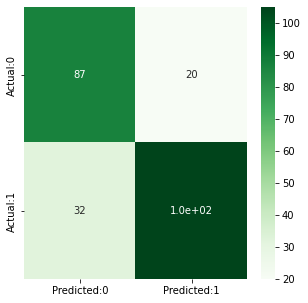

In [ ]:
cm_l= confusion_matrix(y_test, SVM_l_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_l_pred))
cm_l= pd.DataFrame(data = cm_l, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_l_r=cross_val_score(SVM_l, x, y, scoring="recall", cv = 5).mean()
SVM_l_p=cross_val_score(SVM_l, x, y, scoring="precision", cv = 5).mean()
SVM_l_f1=cross_val_score(SVM_l, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_l_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_l_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_l_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_l, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)


Gaussian radial basis function Kernel


 CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.74      0.79      0.77       107
           1       0.83      0.78      0.80       137

    accuracy                           0.79       244
   macro avg       0.78      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 RECALL SCORE  :  0.781021897810219

 PRECISION SCORE :  0.8294573643410853

 F1 SCORE  :  0.8045112781954887




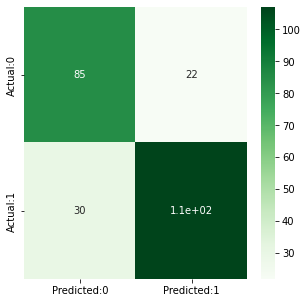

In [ ]:
cm_g= confusion_matrix(y_test, SVM_g_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_g_pred))
cm_g= pd.DataFrame(data = cm_g, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_g_r= cross_val_score(SVM_g, x, y, scoring="recall", cv = 5).mean()
SVM_g_p= cross_val_score(SVM_g, x, y, scoring="precision", cv = 5).mean()
SVM_g_f1= cross_val_score(SVM_g, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_g_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_g_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_g_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_g, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)

Polynomial Kernel


 CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.73      0.81      0.77       107
           1       0.84      0.77      0.80       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 RECALL SCORE  :  0.7664233576642335

 PRECISION SCORE :  0.84

 F1 SCORE  :  0.8015267175572518




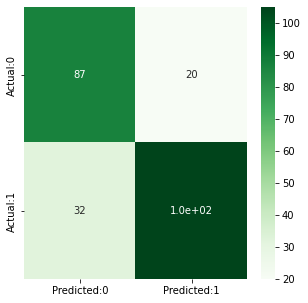

In [ ]:
cm_p= confusion_matrix(y_test, SVM_p_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_p_pred))
cm_p= pd.DataFrame(data = cm_p, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_p_r=cross_val_score(SVM_p, x, y, scoring="recall", cv = 5).mean()
SVM_p_p= cross_val_score(SVM_p, x, y, scoring="precision", cv = 5).mean()
SVM_p_f1= cross_val_score(SVM_p, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_p_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_p_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_p_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_p, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)


Sigmoid Kernel


 CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.62      0.68      0.65       107
           1       0.73      0.67      0.70       137

    accuracy                           0.68       244
   macro avg       0.67      0.68      0.67       244
weighted avg       0.68      0.68      0.68       244


 RECALL SCORE  :  0.6715328467153284

 PRECISION SCORE :  0.7301587301587301

 F1 SCORE  :  0.6996197718631177




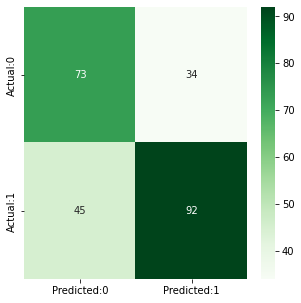

In [ ]:
cm_s= confusion_matrix(y_test, SVM_s_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_s_pred))
cm_s= pd.DataFrame(data = cm_s, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_s_r=cross_val_score(SVM_s, x, y, scoring="recall", cv = 5).mean()
SVM_s_p=cross_val_score(SVM_s, x, y, scoring="precision", cv = 5).mean()
SVM_s_f1=cross_val_score(SVM_s, x, y, scoring="f1", cv = 5).mean()
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_s_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_s_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_s_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_s, annot = True, cmap = "Greens")
plt.show()


**TESTING**

In [ ]:
# # Predicting a new result - target 0
# print(SVM.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))


In [ ]:
# # Predicting a new result - target 1
# print(SVM.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))


In [ ]:
# import joblib
# model = joblib.load('model.pkl')
# model.predict(previously_loaded_data)
# clf = load('filename.joblib') 

**ACCURACY**

In [ ]:
# print("Linear:",SVM_l_Score)
# print("RBF:",SVM_g_Score)
# print("POLYNOMIAL:",SVM_p_Score)
# print("SIGMOID:",SVM_s_Score)


In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["KERNELS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Linear",SVM_l_Score,SVM_l_p,SVM_l_r,SVM_l_f1]) 
myTable.add_row(["RBF",SVM_g_Score,SVM_g_p,SVM_g_r,SVM_g_f1]) 
myTable.add_row(["Polynomial",SVM_p_Score,SVM_p_p,SVM_p_r,SVM_p_f1]) 
myTable.add_row(["Sigmoid",SVM_s_Score,SVM_s_p,SVM_s_r,SVM_s_f1])  
print(myTable)


+------------+--------------------+--------------------+--------------------+--------------------+
|  KERNELS   |      ACCURACY      |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+------------+--------------------+--------------------+--------------------+--------------------+
|   Linear   | 0.7827868852459016 | 0.8103422900130826 | 0.7961636263128801 | 0.7999036101854167 |
|    RBF     | 0.5303278688524591 | 0.5427112330012708 | 0.8918518518518518 | 0.6714297003770688 |
| Polynomial | 0.527049180327869  | 0.5385245901639344 | 0.9333333333333332 | 0.6810845836484309 |
|  Sigmoid   | 0.5647540983606557 | 0.5968155327120068 | 0.6385074626865672 | 0.6148221785280035 |
+------------+--------------------+--------------------+--------------------+--------------------+



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       107
           1       0.78      0.72      0.75       137

    accuracy                           0.73       244
   macro avg       0.72      0.73      0.72       244
weighted avg       0.73      0.73      0.73       244


 CONFUSION MATRIX



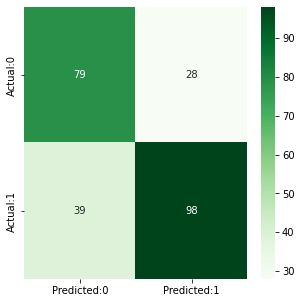


 ACCURACY SCORE  :  0.7254098360655737

 PRECISION SCORE :  0.7777777777777778

 RECALL SCORE :  0.6817357656163626

 F1 SCORE :  0.6999349449342855


In [ ]:
# To find the accuracy result for DTA
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_Pred = DT.predict(x_test)
DT_accuracy = cross_val_score(DT, x, y, scoring="accuracy", cv = 5).mean()
DT_precision = cross_val_score(DT, x, y, scoring="precision", cv = 5).mean()
DT_recall_score = cross_val_score(DT, x, y, scoring="recall", cv = 5).mean()
DT_f1_score = cross_val_score(DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, DT_Pred))
print('\n RECALL SCORE : ', DT_recall_score)
print('\n F1 SCORE : ', DT_f1_score)


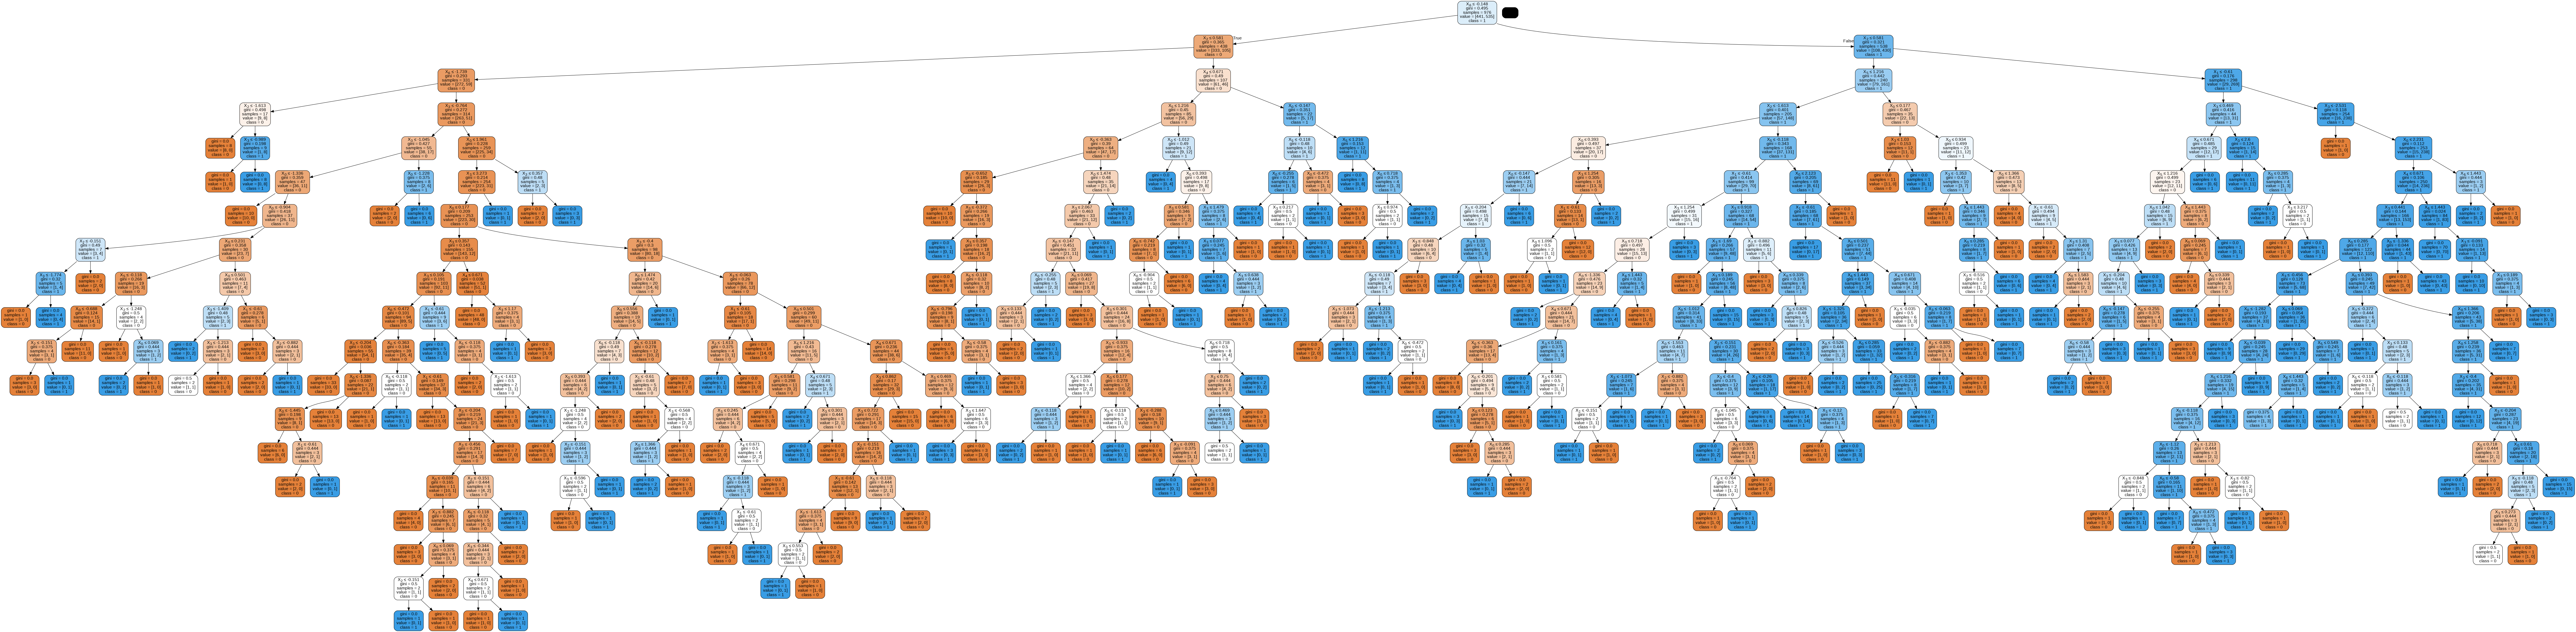

In [ ]:
#Tree Prediction
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.70      0.73      0.71       107
           1       0.78      0.75      0.77       137

    accuracy                           0.74       244
   macro avg       0.74      0.74      0.74       244
weighted avg       0.74      0.74      0.74       244


 CONFUSION MATRIX



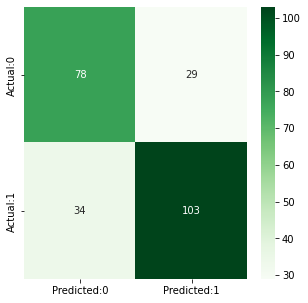


 ACCURACY SCORE  :  0.7418032786885246

 PRECISION SCORE :  0.7803030303030303

 RECALL SCORE :  0.7518248175182481

 F1 SCORE : 0.7657992565055761


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating information gain...
from sklearn.tree import DecisionTreeClassifier

E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
E_DT = E_DT.fit(x_train, y_train)
E_DT_Pred = E_DT.predict(x_test)
E_DT_accuracy = cross_val_score(E_DT, x, y, scoring="accuracy", cv = 5).mean()
E_DT_precision = cross_val_score(E_DT, x, y, scoring="precision", cv = 5).mean()
E_DT_recall_score = cross_val_score(E_DT, x, y, scoring="recall", cv = 5).mean()
E_DT_f1_score = cross_val_score(E_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test, E_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,E_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, E_DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, E_DT_Pred))
print('\n RECALL SCORE : ',recall_score(y_test,E_DT_Pred))
print('\n F1 SCORE :',f1_score(y_test,E_DT_Pred))


 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.68      0.75      0.71       107
           1       0.79      0.72      0.75       137

    accuracy                           0.73       244
   macro avg       0.73      0.74      0.73       244
weighted avg       0.74      0.73      0.73       244


 CONFUSION MATRIX



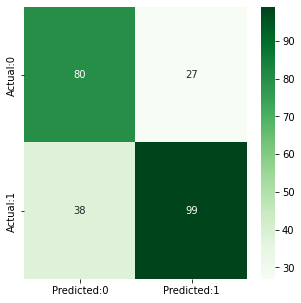


 ACCURACY SCORE  :  0.7336065573770492

 PRECISION SCORE :  0.7857142857142857

 RECALL SCORE :  0.7226277372262774

 F1 SCORE : 0.752851711026616


In [ ]:
# To find the accuracy result for DTA using GINI algorithm used for calculating Gini index...
from sklearn.tree import DecisionTreeClassifier

GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)
GI_DT.fit(x_train, y_train)
GI_DT_Pred = GI_DT.predict(x_test)
GI_DT_accuracy = cross_val_score(GI_DT, x, y, scoring="accuracy", cv = 5).mean()
GI_DT_precision = cross_val_score(GI_DT, x, y, scoring="precision", cv = 5).mean()
GI_DT_recall_score = cross_val_score(GI_DT, x, y, scoring="recall", cv = 5).mean()
GI_DT_f1_score = cross_val_score(GI_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test,GI_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GI_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test,GI_DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test,GI_DT_Pred))
print('\n RECALL SCORE : ',recall_score(y_test,GI_DT_Pred))
print('\n F1 SCORE :',f1_score(y_test,GI_DT_Pred))

RESULT:

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
print(myTable)

+------------------+--------------------+--------------------+--------------------+--------------------+
|     CRITERIA     |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------+--------------------+--------------------+--------------------+--------------------+
| Information Gain | 0.6967213114754098 | 0.7474265984557693 | 0.6892426755113321 | 0.7086063713288948 |
|    Gini Index    | 0.6836065573770492 | 0.7305292604286802 | 0.6862023217247099 | 0.699852297556886  |
+------------------+--------------------+--------------------+--------------------+--------------------+


PREDECTION:

In [ ]:
print("The prediction value for Entropy Method : ")
print(E_DT_Pred)

The prediction value for Entropy Method : 
[0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0]


In [ ]:
print("The prediction value for Gini Index Method : ")
print(GI_DT_Pred)

The prediction value for Gini Index Method : 
[0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0]


# **DECISION TREE ALGORITHM**



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.67      0.75      0.70       107
           1       0.78      0.71      0.74       137

    accuracy                           0.73       244
   macro avg       0.72      0.73      0.72       244
weighted avg       0.73      0.73      0.73       244


 CONFUSION MATRIX



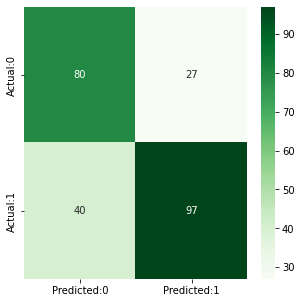


 ACCURACY SCORE  :  0.6844262295081968

 PRECISION SCORE :  0.7267348960277964

 RECALL SCORE :  0.6787064676616915

 F1 SCORE :  0.6989773076278486


In [ ]:
# To find the accuracy result for DTA
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_Pred = DT.predict(x_test)
DT_accuracy = cross_val_score(DT, x, y, scoring="accuracy", cv = 5).mean()
DT_precision = cross_val_score(DT, x, y, scoring="precision", cv = 5).mean()
DT_recall_score = cross_val_score(DT, x, y, scoring="recall", cv = 5).mean()
DT_f1_score = cross_val_score(DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', DT_accuracy)
print('\n PRECISION SCORE : ',DT_precision)
print('\n RECALL SCORE : ', DT_recall_score)
print('\n F1 SCORE : ', DT_f1_score)

#Shree Raksha

In [ ]:
# #Tree Prediction
# dot_data = StringIO()
# export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())


 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.70      0.73      0.71       107
           1       0.78      0.75      0.77       137

    accuracy                           0.74       244
   macro avg       0.74      0.74      0.74       244
weighted avg       0.74      0.74      0.74       244


 CONFUSION MATRIX



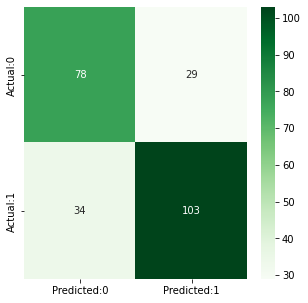


 ACCURACY SCORE  :  0.6967213114754098

 PRECISION SCORE :  0.7474265984557693

 RECALL SCORE :  0.6892426755113321

 F1 SCORE : 0.7086063713288948


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating information gain...
from sklearn.tree import DecisionTreeClassifier

E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
E_DT = E_DT.fit(x_train, y_train)
E_DT_Pred = E_DT.predict(x_test)
E_DT_accuracy = cross_val_score(E_DT, x, y, scoring="accuracy", cv = 5).mean()
E_DT_precision = cross_val_score(E_DT, x, y, scoring="precision", cv = 5).mean()
E_DT_recall_score = cross_val_score(E_DT, x, y, scoring="recall", cv = 5).mean()
E_DT_f1_score = cross_val_score(E_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test, E_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,E_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', E_DT_accuracy)
print('\n PRECISION SCORE : ',E_DT_precision)
print('\n RECALL SCORE : ',E_DT_recall_score)
print('\n F1 SCORE :',E_DT_f1_score)


 CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.68      0.75      0.71       107
           1       0.79      0.72      0.75       137

    accuracy                           0.73       244
   macro avg       0.73      0.74      0.73       244
weighted avg       0.74      0.73      0.73       244


 CONFUSION MATRIX



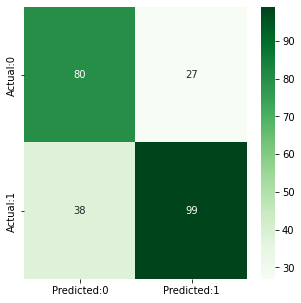


 ACCURACY SCORE  :  0.6836065573770492

 PRECISION SCORE :  0.7305292604286802

 RECALL SCORE :  0.6862023217247099

 F1 SCORE : 0.7086063713288948


In [ ]:
# To find the accuracy result for DTA using GINI algorithm used for calculating Gini index...
from sklearn.tree import DecisionTreeClassifier

GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)
GI_DT.fit(x_train, y_train)
GI_DT_Pred = GI_DT.predict(x_test)
GI_DT_accuracy = cross_val_score(GI_DT, x, y, scoring="accuracy", cv = 5).mean()
GI_DT_precision = cross_val_score(GI_DT, x, y, scoring="precision", cv = 5).mean()
GI_DT_recall_score = cross_val_score(GI_DT, x, y, scoring="recall", cv = 5).mean()
GI_DT_f1_score = cross_val_score(GI_DT, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT :', classification_report(y_test,GI_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GI_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', GI_DT_accuracy)
print('\n PRECISION SCORE : ', GI_DT_precision)
print('\n RECALL SCORE : ',GI_DT_recall_score)
print('\n F1 SCORE :',E_DT_f1_score)

RESULT:

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
print(myTable)

+------------------+--------------------+--------------------+--------------------+--------------------+
|     CRITERIA     |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------+--------------------+--------------------+--------------------+--------------------+
| Information Gain | 0.6967213114754098 | 0.7474265984557693 | 0.6892426755113321 | 0.7086063713288948 |
|    Gini Index    | 0.6836065573770492 | 0.7305292604286802 | 0.6862023217247099 | 0.699852297556886  |
+------------------+--------------------+--------------------+--------------------+--------------------+


PREDECTION:

In [ ]:
print("The prediction value for Entropy Method : ")
print(E_DT_Pred)

The prediction value for Entropy Method : 
[0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0]


In [ ]:
print("The prediction value for Gini Index Method : ")
print(GI_DT_Pred)

The prediction value for Gini Index Method : 
[0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0]


TESTING:

In [ ]:
# # Predicting a new result - target 0
# print(DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(E_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(GI_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **RANDOM FOREST ALGORITHM**



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       107
           1       0.84      0.77      0.81       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.80      0.79      0.79       244


 CONFUSION MATRIX
 [[ 87  20]
 [ 31 106]]

 ACCURACY SCORE  :  0.7368852459016393

 PRECISION SCORE :  0.7759227013466908

 RECALL SCORE :  0.7323714759535656

 F1 SCORE : 0.7548626274166239


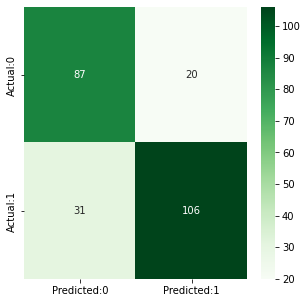

In [ ]:
# To find the accuracy for RFA
from sklearn.ensemble import RandomForestClassifier
    
RDF = RandomForestClassifier()
RDF.fit(x_train,y_train)
RDF_pred = RDF.predict(x_test)
RDF_accuracy = cross_val_score(RDF, x, y, scoring="accuracy", cv = 5).mean()
RDF_precision =  cross_val_score(RDF, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score =  cross_val_score(RDF, x, y, scoring="recall", cv = 5).mean()
RDF_Score =  cross_val_score(RDF, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, RDF_pred))
print('\n ACCURACY SCORE  : ', RDF_accuracy)
print('\n PRECISION SCORE : ', RDF_precision)
print('\n RECALL SCORE : ',RDF_recall_score)
print('\n F1 SCORE :',RDF_Score)
cm= confusion_matrix(y_test, RDF_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

#Shree Raksha

In [ ]:
# #Tree Prediction
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# model = RandomForestClassifier(n_estimators=100)
# model.fit(x_train,y_train)

# # Extract single tree
# estimator = model.estimators_[50]

# from sklearn.tree import export_graphviz
# dot_data = StringIO()
# export_graphviz(estimator, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [ ]:
# #Splited based on the sub-tree graph
# from matplotlib.cm import rainbow

# rf_scores = []
# estimators = [10, 100, 200, 500, 1000]
# for i in estimators:
#     rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
#     rf_classifier.fit(x_train, y_train)
#     rf_scores.append(rf_classifier.score(x_test, y_test))
# colors = rainbow(np.linspace(0, 1, len(estimators)))
# plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
# for i in range(len(estimators)):
#      plt.text(i,round(rf_scores[i],3),round(rf_scores[i],3))
# plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
# plt.xlabel('Number of estimators')
# plt.ylabel('Scores')
# plt.title('Random Forest Classifier scores for different number of estimators')



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       107
           1       0.84      0.78      0.81       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 CONFUSION MATRIX : 



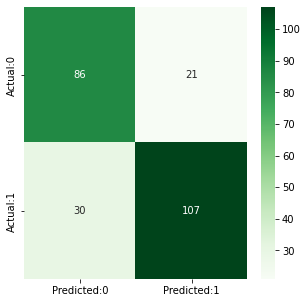


 ACCURACY SCORE  :  0.7516639027086788

 PRECISION SCORE :  0.7926757241209005

 RECALL SCORE :  0.7516639027086788

 F1 SCORE :  0.761843768377633


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating Information gain...
from sklearn.ensemble import RandomForestClassifier
    
RDF_E = RandomForestClassifier(criterion='entropy',random_state=0)
RDF_E.fit(x_train,y_train)
RDF_pred_E = RDF_E.predict(x_test)
RDF_accuracy_E = cross_val_score(RDF_E, x, y, scoring="recall", cv = 5).mean()
RDF_precision_E = cross_val_score(RDF_E, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score_E = cross_val_score(RDF_E, x, y, scoring="recall", cv = 5).mean()
RDF_Score_E = cross_val_score(RDF_E, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_E))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_E)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', RDF_accuracy_E)
print('\n PRECISION SCORE : ', RDF_precision_E)
print('\n RECALL SCORE : ', RDF_recall_score_E)
print('\n F1 SCORE : ',RDF_Score_E)


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       107
           1       0.84      0.77      0.81       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.80      0.79      0.79       244


 CONFUSION MATRIX : 



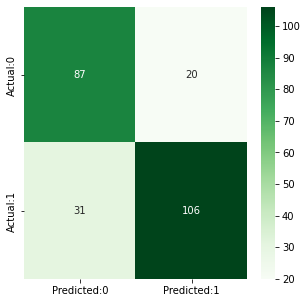


 ACCURACY SCORE  :  0.7483606557377049

 PRECISION SCORE :  0.7916896138525884

 RECALL SCORE :  0.7472305140961858

 F1 SCORE : 0.7579319553437138


In [ ]:
# To find the accuracy result for DTA using CART algorithm used for calculating Gini index...
from sklearn.ensemble import RandomForestClassifier
    
RDF_GI = RandomForestClassifier(criterion='gini', random_state=0)
RDF_GI.fit(x_train,y_train)
RDF_pred_GI= RDF.predict(x_test)
RDF_accuracy_GI = cross_val_score(RDF_GI, x, y, scoring="accuracy", cv = 5).mean()
RDF_precision_GI = cross_val_score(RDF_GI, x, y, scoring="precision", cv = 5).mean()
RDF_recall_score_GI = cross_val_score(RDF_GI, x, y, scoring="recall", cv = 5).mean()
RDF_Score_GI = cross_val_score(RDF_GI, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_GI))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_GI)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ',RDF_accuracy_GI )
print('\n PRECISION SCORE : ',RDF_precision_GI)
print('\n RECALL SCORE : ',RDF_recall_score_GI)
print('\n F1 SCORE :',RDF_Score_GI)

RESULT

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',RDF_accuracy_E,RDF_precision_E ,RDF_recall_score_E ,RDF_Score_E]) 
myTable.add_row(['Gini Index',RDF_accuracy_GI,RDF_precision_GI ,RDF_recall_score_GI ,RDF_Score_GI])   
print(myTable)

+------------------+--------------------+--------------------+--------------------+--------------------+
|     CRITERIA     |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------+--------------------+--------------------+--------------------+--------------------+
| Information Gain | 0.7516639027086788 | 0.7926757241209005 | 0.7516639027086788 | 0.761843768377633  |
|    Gini Index    | 0.7483606557377049 | 0.7916896138525884 | 0.7472305140961858 | 0.7579319553437138 |
+------------------+--------------------+--------------------+--------------------+--------------------+


PREDICTION

In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_E)

The prediction value for Entropy Method : 
[0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1]


In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_GI)

The prediction value for Entropy Method : 
[0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1]


# **NAIVE BAYES**


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       107
           1       0.80      0.70      0.75       137

    accuracy                           0.73       244
   macro avg       0.73      0.74      0.73       244
weighted avg       0.74      0.73      0.73       244


 CONFUSION MATRIX
 [[83 24]
 [41 96]]

 ACCURACY SCORE  :  0.7278688524590164

 PRECISION SCORE :  0.7813539651837524

 RECALL SCORE :  0.7076064123825317

 F1 SCORE : 0.7073982642649905


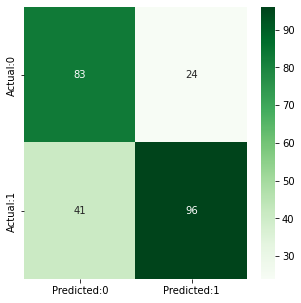

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

bayes_accuracy = cross_val_score(classifier, x, y, scoring="accuracy", cv = 5).mean()
bayes_precision = cross_val_score(classifier, x, y, scoring="precision", cv = 5).mean()
bayes_recall_score = cross_val_score(classifier, x, y, scoring="recall", cv = 5).mean()
bayes_Score = cross_val_score(classifier, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', bayes_accuracy)
print('\n PRECISION SCORE : ', bayes_precision)
print('\n RECALL SCORE : ',bayes_recall_score)
print('\n F1 SCORE :',bayes_Score)
cm= confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Naive Bayes",bayes_accuracy,bayes_precision,bayes_recall_score,bayes_Score])
print(myTable)

+-------------+--------------------+--------------------+--------------------+--------------------+
|   METRICS   |      ACCURACY      |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-------------+--------------------+--------------------+--------------------+--------------------+
| Naive Bayes | 0.7278688524590164 | 0.7813539651837524 | 0.7076064123825317 | 0.7073982642649905 |
+-------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
print("The prediction value for NB Method : ")
print(y_pred)

The prediction value for NB Method : 
[0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1]


# **LOGISTIC REGRESSION**



 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       107
           1       0.85      0.76      0.80       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 CONFUSION MATRIX
 [[ 88  19]
 [ 33 104]]

 ACCURACY SCORE  :  0.7336065573770492

 PRECISION SCORE :  0.7879058920943405

 RECALL SCORE :  0.7297180762852404

 F1 SCORE :  0.7214910618322342

 CONFUSION MATRIX



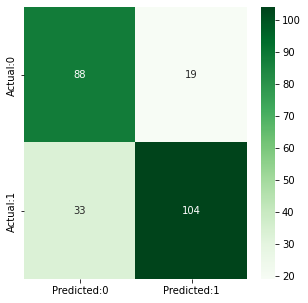

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_Pred= logreg.predict(x_test)
logreg_accuracy = cross_val_score(logreg, x, y, scoring="accuracy", cv = 5).mean()
logreg_precision = cross_val_score(logreg, x, y, scoring="precision", cv = 5).mean()
logreg_recall_score = cross_val_score(logreg, x, y, scoring="recall", cv = 5).mean()
logreg_f1_score = cross_val_score(logreg, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred))
print('\n ACCURACY SCORE  : ',logreg_accuracy)
print('\n PRECISION SCORE : ',logreg_precision)
print('\n RECALL SCORE : ', logreg_recall_score)
print('\n F1 SCORE : ', logreg_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       107
           1       0.85      0.76      0.80       137

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.79      0.79      0.79       244


 CONFUSION MATRIX
 [[ 88  19]
 [ 33 104]]

 ACCURACY SCORE  :  0.7319672131147541

 PRECISION SCORE :  0.7876326680506247

 RECALL SCORE :  0.7267330016583748

 F1 SCORE :  0.7197194082889272

 CONFUSION MATRIX



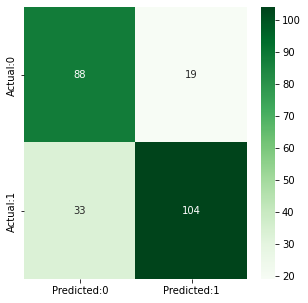

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_M= LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_M.fit(x_train, y_train)
logreg_Pred_M= logreg_M.predict(x_test)
logreg_accuracy_M= cross_val_score(logreg_M, x, y, scoring="accuracy", cv = 5).mean()
logreg_precision_M= cross_val_score(logreg_M, x, y, scoring="precision", cv = 5).mean()
logreg_recall_score_M = cross_val_score(logreg_M, x, y, scoring="recall", cv = 5).mean()
logreg_f1_score_M = cross_val_score(logreg_M, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred_M))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred_M))
print('\n ACCURACY SCORE  : ',logreg_accuracy_M)
print('\n PRECISION SCORE : ',logreg_precision_M)
print('\n RECALL SCORE : ', logreg_recall_score_M)
print('\n F1 SCORE : ', logreg_f1_score_M)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred_M)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall_score, logreg_f1_score]) 
myTable.add_row(['MultinomialRegression ',logreg_accuracy_M,logreg_precision_M,logreg_recall_score_M,logreg_recall_score_M])   
print(myTable)

+------------------------+--------------------+--------------------+--------------------+--------------------+
|        CRITERIA        |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------------------+--------------------+--------------------+--------------------+--------------------+
|  Logistic Regression   | 0.7336065573770492 | 0.7879058920943405 | 0.7297180762852404 | 0.7214910618322342 |
| MultinomialRegression  | 0.7319672131147541 | 0.7876326680506247 | 0.7267330016583748 | 0.7267330016583748 |
+------------------------+--------------------+--------------------+--------------------+--------------------+


# **XGBOOST**


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       107
           1       0.87      0.80      0.83       137

    accuracy                           0.82       244
   macro avg       0.81      0.82      0.81       244
weighted avg       0.82      0.82      0.82       244


 CONFUSION MATRIX
 [[ 90  17]
 [ 28 109]]

 ACCURACY SCORE  :  0.7557377049180328

 PRECISION SCORE :  0.793742482481851

 RECALL SCORE :  0.7650635710337201

 F1 SCORE :  0.769658840402158

 CONFUSION MATRIX



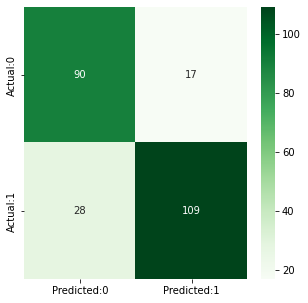

In [ ]:
from xgboost import XGBClassifier

XG = XGBClassifier()

XG.fit(x_train,y_train)

XG_Pred = XG.predict(x_test)
XG_accuracy = cross_val_score(XG, x, y, scoring="accuracy", cv = 5).mean()
XG_precision = cross_val_score(XG, x, y, scoring="precision", cv = 5).mean()
XG_recall_score = cross_val_score(XG, x, y, scoring="recall", cv = 5).mean()
XG_f1_score = cross_val_score(XG, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, XG_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, XG_Pred))
print('\n ACCURACY SCORE  : ', XG_accuracy)
print('\n PRECISION SCORE : ', XG_precision)
print('\n RECALL SCORE : ', XG_recall_score)
print('\n F1 SCORE : ', XG_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,XG_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['XGBoosting',XG_accuracy,XG_precision ,XG_recall_score ,XG_f1_score]) 

print(myTable)

+------------+--------------------+-------------------+--------------------+-------------------+
|  METRICS   |   ACCURACY SCORE   |  PRECISION SCORE  |    RECALL SCORE    |      F1 SCORE     |
+------------+--------------------+-------------------+--------------------+-------------------+
| XGBoosting | 0.7557377049180328 | 0.793742482481851 | 0.7650635710337201 | 0.769658840402158 |
+------------+--------------------+-------------------+--------------------+-------------------+


# **GRADIENT BOOST**


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       107
           1       0.87      0.80      0.83       137

    accuracy                           0.82       244
   macro avg       0.82      0.82      0.82       244
weighted avg       0.82      0.82      0.82       244


 CONFUSION MATRIX
 [[ 90  17]
 [ 27 110]]

 ACCURACY SCORE  :  0.7598360655737704

 PRECISION SCORE :  0.7996967070515384

 RECALL SCORE :  0.7606522940851298

 F1 SCORE :  0.7692903351470879

 CONFUSION MATRIX



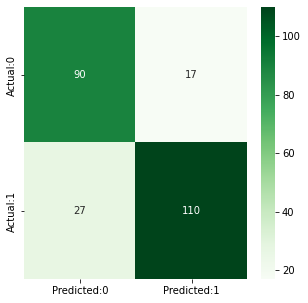

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB_Pred = GB.predict(x_test)
GB_accuracy = cross_val_score(GB, x, y, scoring="accuracy", cv = 5).mean()
GB_precision = cross_val_score(GB, x, y, scoring="precision", cv = 5).mean()
GB_recall_score = cross_val_score(GB, x, y, scoring="recall", cv = 5).mean()
GB_f1_score = cross_val_score(GB, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, GB_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, GB_Pred))
print('\n ACCURACY SCORE  : ', GB_accuracy)
print('\n PRECISION SCORE : ', GB_precision)
print('\n RECALL SCORE : ', GB_recall_score)
print('\n F1 SCORE : ', GB_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GB_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['Gradient Boosting',GB_accuracy,GB_precision ,GB_recall_score ,GB_f1_score]) 

print(myTable)

+-------------------+--------------------+--------------------+--------------------+--------------------+
|      METRICS      |   ACCURACY SCORE   |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-------------------+--------------------+--------------------+--------------------+--------------------+
| Gradient Boosting | 0.7598360655737704 | 0.7996967070515384 | 0.7606522940851298 | 0.7692903351470879 |
+-------------------+--------------------+--------------------+--------------------+--------------------+


# **ADABOOST**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       107
           1       0.83      0.80      0.82       137

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244


 CONFUSION MATRIX
 [[ 85  22]
 [ 27 110]]

 ACCURACY SCORE  :  0.7418032786885246

 PRECISION SCORE :  0.7612689591695504

 RECALL SCORE :  0.7755776672194583

 F1 SCORE :  0.7594279619157814

 CONFUSION MATRIX



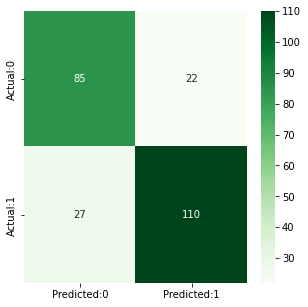

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
model1 = abc.fit(x_train, y_train)
y_pred = model1.predict(x_test)

ada_accuracy = cross_val_score(abc, x, y, scoring="accuracy", cv = 5).mean()
ada_precision = cross_val_score(abc, x, y, scoring="precision", cv = 5).mean()
ada_recall_score = cross_val_score(abc, x, y, scoring="recall", cv = 5).mean()
ada_f1_score = cross_val_score(abc, x, y, scoring="f1", cv = 5).mean()
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', ada_accuracy)
print('\n PRECISION SCORE : ',ada_precision)
print('\n RECALL SCORE : ', ada_recall_score)
print('\n F1 SCORE : ', ada_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()



In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.79      0.78       107
           1       0.83      0.80      0.82       137

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244



In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['AdaBoosting',ada_accuracy,ada_precision ,ada_recall_score ,ada_f1_score]) 

print(myTable)

+-------------+--------------------+--------------------+--------------------+--------------------+
|   METRICS   |   ACCURACY SCORE   |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-------------+--------------------+--------------------+--------------------+--------------------+
| AdaBoosting | 0.7418032786885246 | 0.7612689591695504 | 0.7755776672194583 | 0.7594279619157814 |
+-------------+--------------------+--------------------+--------------------+--------------------+


# **MODEL ACCURACY**

In [ ]:
myTable = PrettyTable(["    KNN_NB-METRICS    ", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"])  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc,KNN_ma_p,KNN_ma_r,KNN_ma_f1]) 
myTable.add_row(["Minkowski",KNN_mi_acc,KNN_mi_p,KNN_mi_r,KNN_mi_f1]) 
myTable.add_row(["Euclidean",KNN_e_acc,KNN_e_p,KNN_e_r,KNN_e_f1]) 
myTable.add_row(["Jaccard",KNN_j_acc,KNN_j_p,KNN_j_r,KNN_j_f1]) 
myTable.add_row(["Hamming",KNN_h_acc,KNN_h_p,KNN_h_r,KNN_h_f1]) 
myTable.add_row(["Cosine",KNN_c_acc,KNN_c_p,KNN_c_r,KNN_c_f1]) 
# Add rows 
myTable.add_row(["Naive Bayes",bayes_accuracy,bayes_precision,bayes_recall_score,bayes_Score])
print(myTable)
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["     SVM-KERNELS      ", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
# Add rows 
myTable.add_row(["Linear",SVM_l_Score,SVM_l_p,SVM_l_r,SVM_l_f1]) 
myTable.add_row(["RBF",SVM_g_Score,SVM_g_p,SVM_g_r,SVM_g_f1]) 
myTable.add_row(["Polynomial",SVM_p_Score,SVM_p_p,SVM_p_r,SVM_p_f1]) 
myTable.add_row(["Sigmoid",SVM_s_Score,SVM_s_p,SVM_s_r,SVM_s_f1])  
print(myTable)
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["DT_RF_LR-CRITERIA","Accuracy","Precision", "Recall", "F1"])   
# Add rows 
myTable.add_row(['DT-Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['DT-Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
# Add rows 
myTable.add_row(['RF-Information Gain',RDF_accuracy_E,RDF_precision_E ,RDF_recall_score_E ,RDF_Score_E]) 
myTable.add_row(['RF-Gini Index',RDF_accuracy_GI,RDF_precision_GI ,RDF_recall_score_GI ,RDF_Score_GI])   
# Add rows 
myTable.add_row(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall_score, logreg_f1_score]) 
myTable.add_row(['MultinomialRegression ',logreg_accuracy_M,logreg_precision_M,logreg_recall_score_M,logreg_recall_score_M])   
print(myTable)


+------------------------+--------------------+--------------------+--------------------+--------------------+
|     KNN_NB-METRICS     |      ACCURACY      |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+------------------------+--------------------+--------------------+--------------------+--------------------+
|       Manhattan        | 0.6131147540983607 |  0.63801036001036  | 0.6524267551133223 | 0.6330163597599349 |
|       Minkowski        | 0.5745901639344263 | 0.5914900846755098 | 0.6153454947484799 | 0.5876745974213404 |
|       Euclidean        | 0.5745901639344263 | 0.5914900846755098 | 0.6153454947484799 | 0.5876745974213404 |
|        Jaccard         | 0.5991803278688524 | 0.6543541546173125 | 0.6109010503040354 | 0.6038336949528601 |
|        Hamming         | 0.7352459016393442 | 0.7677228941426248 | 0.7427418463239359 | 0.7508952542419449 |
|         Cosine         | 0.6598360655737705 | 0.692650933936525  | 0.7013819789939193 | 0.6828635346074334 |
|

Text(0.5, 1.0, 'Model Accuracy')

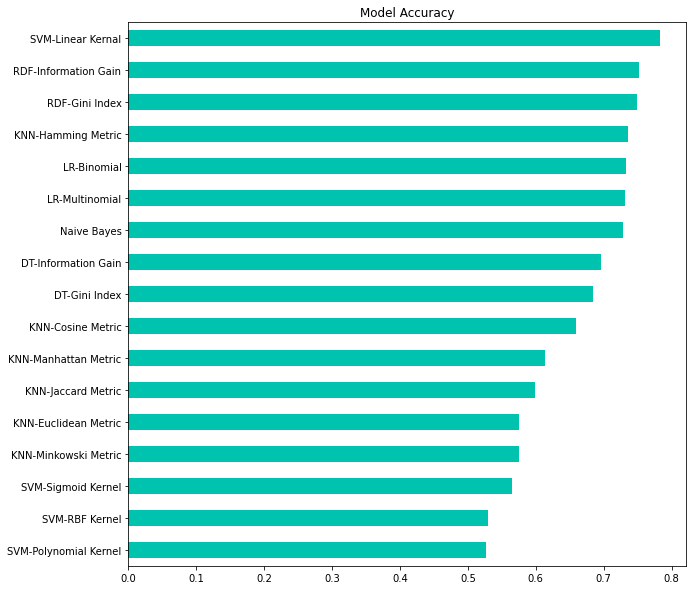

In [ ]:
model_accuracy = pd.Series(data=[KNN_ma_acc,KNN_mi_acc,KNN_e_acc,KNN_j_acc,KNN_h_acc,KNN_c_acc,SVM_l_Score,SVM_g_Score,SVM_p_Score,SVM_s_Score,E_DT_accuracy,GI_DT_accuracy,RDF_accuracy_E,RDF_accuracy_GI,logreg_accuracy,logreg_accuracy_M,bayes_accuracy], 
                index=['KNN-Manhattan Metric','KNN-Minkowski Metric','KNN-Euclidean Metric','KNN-Jaccard Metric','KNN-Hamming Metric','KNN-Cosine Metric','SVM-Linear Kernal','SVM-RBF Kernel','SVM-Polynomial Kernel','SVM-Sigmoid Kernel','DT-Information Gain','DT-Gini Index','RDF-Information Gain','RDF-Gini Index','LR-Binomial','LR-Multinomial','Naive Bayes'])
fig= plt.figure(figsize=(10,10))
model_accuracy.sort_values().plot.barh(color={ "#00C3af"})
plt.title('Model Accuracy')

# **BOOSTING MODEL ACCURACY**

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['AdaBoosting',ada_accuracy,ada_precision ,ada_recall_score ,ada_f1_score]) 
myTable.add_row(['XGBoosting',XG_accuracy,XG_precision ,XG_recall_score ,XG_f1_score]) 
myTable.add_row(['GBBoosting',GB_accuracy,GB_precision ,GB_recall_score ,GB_f1_score]) 
print(myTable)

+-------------+--------------------+--------------------+--------------------+--------------------+
|   METRICS   |   ACCURACY SCORE   |  PRECISION SCORE   |    RECALL SCORE    |      F1 SCORE      |
+-------------+--------------------+--------------------+--------------------+--------------------+
| AdaBoosting | 0.7418032786885246 | 0.7612689591695504 | 0.7755776672194583 | 0.7594279619157814 |
|  XGBoosting | 0.7557377049180328 | 0.793742482481851  | 0.7650635710337201 | 0.769658840402158  |
|  GBBoosting | 0.7598360655737704 | 0.7996967070515384 | 0.7606522940851298 | 0.7692903351470879 |
+-------------+--------------------+--------------------+--------------------+--------------------+


Text(0.5, 1.0, 'Model Accuracy')

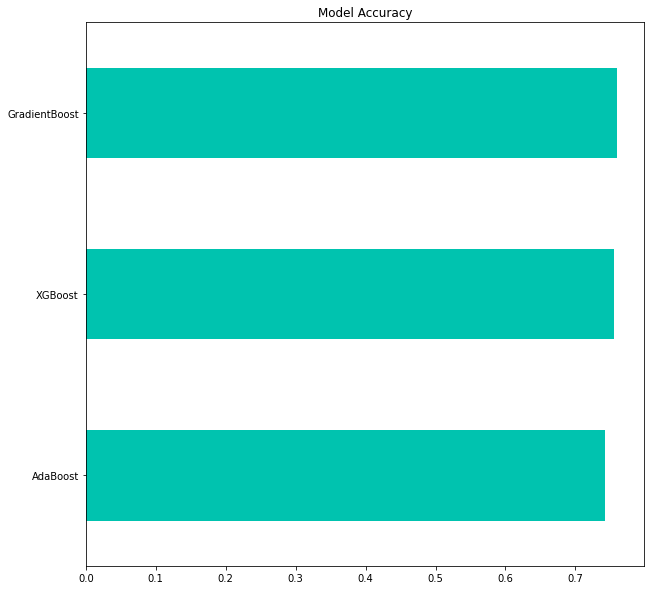

In [ ]:
model_accuracy = pd.Series(data=[ada_accuracy,GB_accuracy,XG_accuracy], 
                index=['AdaBoost','GradientBoost','XGBoost'])
fig= plt.figure(figsize=(10,10))
model_accuracy.sort_values().plot.barh(color={ "#00C3af"})
plt.title('Model Accuracy')

# **IMPORTING DATASET CONSISTING ACCURACIES**

In [ ]:
# print("MINKOWSKI:",KNN_mi.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("SVM      :",SVM.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("DT       :",E_DT.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("RDF      :",RDF_E.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2		]])))
# print("NB       :",classifier.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("LR       :",logreg.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))

In [ ]:
# #Importing required libraries
# from sklearn.datasets import load_breast_cancer
# import pandas as pd
# from sklearn.model_selection import KFold 
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
 
# #Loading the dataset
# df = pd.read_csv('/content/heart(303).csv')
# x = df.iloc[:,:-1]
# y = df.iloc[:,-1]
 
# #Implementing cross validation
 
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = LogisticRegression(solver= 'liblinear')
 
# acc_score = []
 
# for train_index , test_index in kf.split(x):
#     x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
     
#     model.fit(x_train,y_train)
#     pred_values = model.predict(x_test)
     
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
     
# avg_acc_score = sum(acc_score)/k
 
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
#3 metrics
KNN_mi= KNeighborsClassifier(n_neighbors=5, metric = 'minkowski') 
KNN_e= KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_ma= KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='uniform')
KNN_j= KNeighborsClassifier(n_neighbors=5, metric = 'jaccard')
KNN_h= KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
KNN_c= KNeighborsClassifier(n_neighbors=5, metric = 'cosine')
E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)

KNN_mi.fit(x_train, y_train)
KNN_e.fit(x_train, y_train)
KNN_ma.fit(x_train, y_train)
KNN_j.fit(x_train, y_train)
KNN_h.fit(x_train, y_train)
KNN_c.fit(x_train, y_train)
E_DT = E_DT.fit(x_train, y_train)
GI_DT = GI_DT.fit(x_train, y_train)

y_pred_mi= KNN_mi.predict(x_test)
y_pred_e= KNN_e.predict(x_test)
y_pred_ma= KNN_ma.predict(x_test)
y_pred_j= KNN_j.predict(x_test)
y_pred_h= KNN_h.predict(x_test)
y_pred_c= KNN_c.predict(x_test)
E_DT_Pred = E_DT.predict(x_test)
GI_DT_Pred = GI_DT.predict(x_test)


KNN_ma_acc=accuracy_score(y_test, y_pred_ma)
KNN_mi_acc=accuracy_score(y_test, y_pred_mi)
KNN_e_acc=accuracy_score(y_test, y_pred_e)
KNN_j_acc=accuracy_score(y_test, y_pred_j)
KNN_h_acc=accuracy_score(y_test, y_pred_h)
KNN_c_acc=accuracy_score(y_test, y_pred_c)
E_DT_accuracy = accuracy_score(y_test, E_DT_Pred)
GI_DT_accuracy = accuracy_score(y_test, E_DT_Pred)


In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["METRICS", "ACCURACY"]) 
  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc]) 
myTable.add_row(["Minkowski",KNN_mi_acc]) 
myTable.add_row(["Euclidean",KNN_e_acc]) 
myTable.add_row(["Jaccard",KNN_j_acc]) 
myTable.add_row(["Hamming",KNN_h_acc]) 
myTable.add_row(["Cosine",KNN_c_acc])
myTable.add_row(["Entropy",E_DT_accuracy])
myTable.add_row(["Gini Index",GI_DT_accuracy]) 

  
print(myTable)

+------------+--------------------+
|  METRICS   |      ACCURACY      |
+------------+--------------------+
| Manhattan  | 0.7786885245901639 |
| Minkowski  | 0.7868852459016393 |
| Euclidean  | 0.7868852459016393 |
|  Jaccard   | 0.4385245901639344 |
|  Hamming   | 0.8032786885245902 |
|   Cosine   | 0.7909836065573771 |
|  Entropy   | 0.7418032786885246 |
| Gini Index | 0.7418032786885246 |
+------------+--------------------+


# **CORRELATION MATRIX**

In [ ]:
#importing the dataset
data = pd.read_csv('/content/Predictions-both testing and training(1221).csv')
display(data)
all(data)

TARGET  KNN  SVM  DT  RF  NB  LR
0          1    1    0   1   1   0   0
1          1    1    0   1   1   0   0
2          1    1    0   1   1   0   1
3          1    0    0   1   1   0   1
4          1    0    0   1   1   0   0
...      ...  ...  ...  ..  ..  ..  ..
1215       1    0    0   1   1   0   1
1216       1    1    1   1   1   1   1
1217       1    1    1   1   1   1   1
1218       1    1    0   1   1   0   1
1219       0    0    0   0   0   0   0

[1220 rows x 7 columns]

True

In [ ]:
cor={'KNN':0,'SVM':1,'DT':2,'RF':3,'NB':4,'LR':5} #index value 

In [ ]:
rows, cols = (7, 7)
val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
for i in range(1,7):
  for j in range(1,7):
    tt=0
    tf=0
    ft=0
    ff=0
    for count in range(62):
      if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        tt=tt+1
      elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        tf=tf+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        ft=ft+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        ff=ff+1
    try:
      correlation = int (2*ff)/int (tf+ft+(2*ff))
    except ZeroDivisionError:
	    correlation = 0
    val[i][j] = correlation
    # print('\n')

In [ ]:
for i in range(1,7):
  print(f"         {data.columns[i]}",end="")
print("\n")

for i in range(1,7):
  print(data.columns[i],end ="       ")
  for j in range(1,7):
    print(round(val[i][j],2),end = "       ")
  print('\n')



# NB - LR = 0.89
# 0.78 0.77

# KNN - NB and KNN - LR = 0.74
# SVM - NB and SVM - LR = 0.73

# SVM - KNN = 0.7
# 0.80  0.85

# RF - NB and RF - LR = 0.5
# KNN - RF =  0.46
# DT - RF = 0.4
# SVM - RF = 0.38
# KNN - DT = 0.35
# DT - SVM = 0.3

#KNN-LR=0.91
#SVM-KNN=0.75
#SVM-LR=0.67
#KNN-NB=0.6
#NB-LR=0.55

         KNN         SVM         DT         RF         NB         LR

KNN       1.0       0.67       0.0       0.0       0.6       0.52       

SVM       0.67       1.0       0.0       0.0       0.87       0.74       

DT       0.0       0.0       0       0       0.0       0.0       

RF       0.0       0.0       0       0       0.0       0.0       

NB       0.6       0.87       0.0       0.0       1.0       0.82       

LR       0.52       0.74       0.0       0.0       0.82       1.0       



In [ ]:
data = pd.read_csv('/content/Predictions-both testing and training(1221).csv',usecols=['TARGET','KNN','DT','RF','NB'])

rows, cols = (7, 7)
val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
for i in range(1,5):
  for j in range(1,5):
    tt=0
    tf=0
    ft=0
    ff=0
    for count in range(62):
      if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        tt=tt+1
      elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        tf=tf+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        ft=ft+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        ff=ff+1
    try:
      correlation = int (2*ff)/int (tf+ft+(2*ff))
    except ZeroDivisionError:
	    correlation = 0
    val[i][j] = correlation

In [ ]:
for i in range(1,5):
  print(f"        {data.columns[i]}",end="")
print("\n")

for i in range(1,5):
  print(data.columns[i],end ="      ")
  for j in range(1,5):
    print(round(val[i][j],2),end = "      ")
  print('\n')

        KNN        DT        RF        NB

KNN      1.0      0.0      0.0      0.6      

DT      0.0      0      0      0.0      

RF      0.0      0      0      0.0      

NB      0.6      0.0      0.0      1.0      



# **STACKING**

In [ ]:
# from numpy import mean
# from numpy import std
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import StackingClassifier
# from matplotlib import pyplot
# from matplotlib.pyplot import figure
# figure(dpi=80, facecolor='w', edgecolor='k')
 
  
# # get a stacking of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('cart', DecisionTreeClassifier()))
#   level0.append(('rf', RandomForestClassifier()))
#   level0.append(('lr',LogisticRegression()))

#   # define meta learner model
#   level1 = KNeighborsClassifier()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model

# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Decision tree'] = DecisionTreeClassifier()
#   models['Random Forest'] = RandomForestClassifier()
#   models['Logistic Regression'] = LogisticRegression()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')

In [ ]:
# # get a stacking ensemble of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('cart', DecisionTreeClassifier()))
#   level0.append(('lr',LogisticRegression()))
#   level0.append(('knn',KNeighborsClassifier()))

#   # define meta learner model
#   level1 = RandomForestClassifier()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model
 
# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Decision tree'] = DecisionTreeClassifier()
#   models['LogisticRegression'] = LogisticRegression()
#   models['KNN'] = KNeighborsClassifier()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')
  

In [ ]:
# # get a stacking ensemble of models
# def get_stacking():
#   # define the base models
#   level0 = list()
#   level0.append(('rf', RandomForestClassifier()))
#   level0.append(('knn',KNeighborsClassifier()))

#   # define meta learner model
#   level1 = LogisticRegression()

#   # define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#   return model
 
# # get a list of models to evaluate
# def get_models():
#   models = dict()
#   models['Random Forest'] = RandomForestClassifier()
#   models['KNN'] = KNeighborsClassifier()
#   models['Stacking'] = get_stacking()
#   return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model):
#   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#   scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
#   scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
#   scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
#   return scores,scores1,scores2,scores3
 
# # define dataset
# df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
# X,y = df,df1.target

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results,results1,results2,results3,names= list(),list(),list(),list(),list()
# for name, model in models.items():
#   scores= evaluate_model(model)
#   scores1=evaluate_model(model)
#   scores2=evaluate_model(model)
#   scores3=evaluate_model(model)
#   results.append(scores)
#   results1.append(scores1)
#   results2.append(scores2)
#   results3.append(scores3)
#   names.append(name)
#   print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
#   print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
#   print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
#   print('\n')
  

# **LEVEL - 3**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator= LogisticRegression(),cv = 5)

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

print('\n ------------ Prediction of Stacking for training dataset ------------')
clf.fit(x_train, y_train)
Stacking = clf.predict(x_train)
Stacking_accuracy = cross_val_score(clf, x_train, y_train, scoring="accuracy").mean()
Stacking_precision = cross_val_score(clf, x_train, y_train, scoring="precision").mean()
Stacking_recall_score = cross_val_score(clf , x_train, y_train, scoring="recall").mean()
Stacking_f1_score = cross_val_score(clf, x_train, y_train, scoring="f1").mean()
print('\n ACCURACY SCORE  : ', Stacking_accuracy)
print('\n PRECISION SCORE : ', Stacking_precision)
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)

print('\n ------------ Prediction of Stacking for testing dataset ------------')
clf.fit(x_test, y_test)
Stacking = clf.predict(x_test)
Stacking_accuracy = cross_val_score(clf, x_test, y_test, scoring="accuracy").mean()
Stacking_precision = cross_val_score(clf, x_test, y_test, scoring="precision").mean()
Stacking_recall_score = cross_val_score(clf , x_test,y_test, scoring="recall").mean()
Stacking_f1_score = cross_val_score(clf, x_test, y_test, scoring="f1").mean()
print('\n ACCURACY SCORE  : ', Stacking_accuracy)
print('\n PRECISION SCORE : ', Stacking_precision)
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)


 ------------ Prediction of Stacking for training dataset ------------

 ACCURACY SCORE  :  0.745876504447933

 PRECISION SCORE :  0.769361939874627

 RECALL SCORE :  0.7682242990654206

 F1 SCORE :  0.7683601796908149

 ------------ Prediction of Stacking for testing dataset ------------

 ACCURACY SCORE  :  0.7784013605442177

 PRECISION SCORE :  0.7952741935483871

 RECALL SCORE :  0.8312169312169312

 F1 SCORE :  0.8108462587480705


# **DEEP NEURAL NETWORK**

In [ ]:
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model1 = Sequential()
#model1.add(Dense(500, input_dim=11, activation='relu'))
#model1.add(Dense(500, input_dim=200, activation='relu'))
#model1.add(Dense(320, input_dim=200, activation='relu'))
#model1.add(Dense(1, activation='tanh'))


In [ ]:
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
#,tf.keras.metrics.Recall()


In [ ]:
# fit the keras model on the dataset
kera=model.fit(x_train, y_train, epochs=80, batch_size=11,validation_data=(x_val, y_val))
#kera=model.fit(x, y, epochs=150, batch_size=13)

Epoch 1/80


ValueError: ignored

In [ ]:
# evaluate the keras model
_, DNNaccuracy,recall,precision = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (DNNaccuracy*100))
print('recall: %.2f' % (recall*100))
print('precision: %.2f' % (precision*100))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: %.2f' % (F1))


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE"]) 
  
# Add rows 
myTable.add_row(["DNN",DNNaccuracy,precision,recall])
print(myTable)

In [ ]:
kera.history
kera.history['accuracy']
np.mean(kera.history['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
plt.plot(kera.history["loss"])
plt.plot(kera.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
plt.plot(kera.history['accuracy'])
plt.plot(kera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("The prediction value for DNN Method : ")
print(kera)